In [161]:
variable= 'pct_ch_hinc00_16'
binary6typ = variable+'_binary'
model_name = '4_CENSUS_FQ_TW_'+variable+'ALL'

# Analysis of Foursquare Data
# NYU - CUSP UDP Capstone
# Foursquare + NYC Merge by CT 
## Brief
This notebook 
1. Part I. Data Processing

    - import Foursquare data
    - imports the Census Tract shapefile
    - import Typologies
    - merges topologies
    - Spatail join by Census Tract
    - merges topologies
    - map topologies
    - map Businesses
1. Part II. Data Processing
    - Performs a classifcation task on Typologies
###  You can refer to https://github.com/mv1742/updny_2

# Part I. Data Processing


In [162]:
import os
import requests
import shapely
import json

import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%matplotlib inline
#import statsmodels.formula.api as smf
import itertools
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.metrics import silhouette_score
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import geopandas as gpd
import pylab as pl
import io
import pylab as pl

from geopandas import GeoDataFrame
from geopandas.tools import sjoin
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False
from sklearn.linear_model import LogisticRegression
from sklearn import svm
# from sklearn.metrics import confusion_matrix
# from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
# from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
import matplotlib.pylab
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figure', 'seed', 'Polygon', 'linalg']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# NYU - CUSP UDP Capstone
# Foursquare + NYC Merge by CT 
## Brief
This notebook 
- import Foursquare data
- imports the Census Tract shapefile
- import Typologies
- merges topologies
- Spatail join by Census Tract
- merges topologies
- map topologies
- map Businesses
- outputs a .csv of the results
- You can refer to https://github.com/mv1742/updny_2

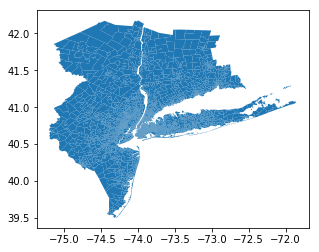

In [163]:
# # url = 'https://planninglabs.carto.com/api/v2/sql?filename=region&q=SELECT%20%2A%20FROM%20region_censustract_v0&format=SHP'
# # NYCzip = getGeoDataFrameFromShpFileZipUrl(url)

# GREATER NY REGION
NYCzip=gpd.read_file('Censustracts/region.shp')
NYCzip.plot()


In [164]:
# # NYC ONLY
# NYCzip=gpd.read_file('./Data/NYC/14000.shp')
# NYCzip.rename(columns={"GEO_ID": "GEOID"},inplace=True)
# NYCzip.plot()
# print(NYCzip.columns,len(NYCzip))
# NYCzip.GEOID = NYCzip.GEOID.str[-11:]

# NYCzip.head(2)

In [165]:
NYCzip.columns

Index(['aland_mi', 'objectid', 'statefp', 'countyfp', 'tractce', 'geoid',
       'name', 'namelsad', 'mtfcc', 'funcstat', 'aland', 'awater', 'intptlat',
       'intptlon', 'shape_leng', 'shape_area', 'atotal', 'atotal_mi',
       'cartodb_id', 'geoid_1', 'hou16', 'hou16moe', 'hou16cv', 'houv16',
       'houv16moe', 'houv16cv', 'houo16', 'houo16moe', 'houo16cv', 'hour16',
       'hour16moe', 'hour16cv', 'emtot15', 'empr15', 'emoff15', 'emins15',
       'emind15', 'emser15', 'emoth15', 'geometry'],
      dtype='object')

In [166]:
NYCzip.rename(columns={"geoid": "GEOID"},inplace=True)
NYCzip.GEOID = NYCzip.GEOID.astype(int)
cols = ['GEOID','geometry']
NYCzip = NYCzip.loc[:,cols]
#NYCzipgdp.plot(column='GEOID',legend = True)
NYCzip.shape
NYCzip.isnull().sum()

GEOID       0
geometry    0
dtype: int64

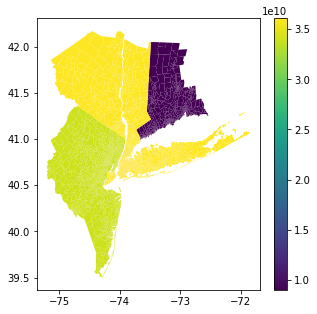

In [167]:
figure, ax = plt.subplots(figsize=(5, 5))
NYCzip.plot(column='GEOID',legend = True, ax=ax)

# Typologies
- import raw Typology file with Census data 'NY_final_data_for_typologies_1.19.19.csv'
- merges Typologies with the new Binary typologies
- map topologies

In [168]:
Typologiespd=pd.read_csv('NY_final_data_for_typologies_1.19.19.csv')
Typologiesgdp = gpd.GeoDataFrame(Typologiespd)
len(Typologiesgdp.columns)

82

In [169]:
Typologiesgdp.rename(columns={'geoid': "GEOID"},inplace=True)
Typologiesgdp.tail()
cols_typ = ['GEOID','Type_1.19']
print(type(Typologiesgdp.iloc[:,0][0]))
#Typologies.rename(columns={'\ufeffgeoid': "GEOID"},inplace=True)
#Typologiesgdp.geoid = Typologies.iloc[:,0]
Typologiesgdp = Typologiesgdp.loc[:,cols_typ]
Typologiesgdp.head()

<class 'numpy.float64'>


,GEOID,Type_1.19
0,9.001010e+09,VHI - Super Gentrification or Exclusion
1,9.001010e+09,VHI - Super Gentrification or Exclusion
2,9.001010e+09,VHI - Super Gentrification or Exclusion
3,9.001010e+09,VHI - Super Gentrification or Exclusion
4,9.001010e+09,VHI - Super Gentrification or Exclusion


In [170]:
Binaries=pd.read_csv('./Data/NEW_6_BINARIES_ALL.csv')
len(Binaries.columns), Binaries.shape
Binaries.drop(columns = 'Unnamed: 0', inplace=True)
Binaries.head()

,pct_ch_percol00_16_binary,pct_ch_hinc00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,Ongoing_adv_gent,gent00_16,gent90_00,Supergent16,GEOID
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34013021601
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34003031100
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34003036200
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34017003500
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34017015500


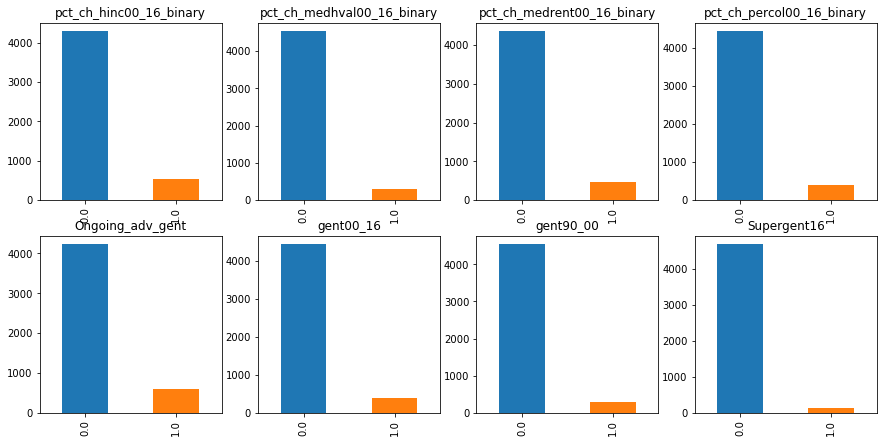

In [171]:
bin_typs = ['pct_ch_hinc00_16_binary',
            'pct_ch_medhval00_16_binary','pct_ch_medrent00_16_binary','pct_ch_percol00_16_binary','Ongoing_adv_gent',
            'gent00_16','gent90_00','Supergent16']
for i, column in enumerate(bin_typs):
    plt.figure(1)
    plt.subplot(4,4,i+1)
    Binaries[column].value_counts().plot(kind='bar', figsize = (15,15), title=column)
    Binaries[column].value_counts()/Binaries[column].value_counts().sum()

In [172]:
Typologiesgdp = Typologiesgdp.merge(Binaries, on= 'GEOID')
Typologiesgdp.shape

(4829, 10)

In [173]:
Typologiesgdp.isnull().sum()


GEOID                         0
Type_1.19                     0
pct_ch_percol00_16_binary     0
pct_ch_hinc00_16_binary       0
pct_ch_medhval00_16_binary    0
pct_ch_medrent00_16_binary    0
Ongoing_adv_gent              0
gent00_16                     0
gent90_00                     0
Supergent16                   0
dtype: int64

In [174]:
merged = NYCzip.merge(Typologiesgdp,on='GEOID')
merged.tail(1)

,GEOID,geometry,Type_1.19,pct_ch_percol00_16_binary,pct_ch_hinc00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,Ongoing_adv_gent,gent00_16,gent90_00,Supergent16
4828,36047152200,"POLYGON ((-73.96408699991511 40.6444069999831,...",MHI - Stable or Early Stage of Exclusion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
print(type(merged),merged.shape)
mergedgpd = gpd.GeoDataFrame(merged)
mergedgpd.shape

<class 'geopandas.geodataframe.GeoDataFrame'> (4829, 11)


(4829, 11)

# LOAD FOURSQUARE DATA

In [176]:
# # Neighbours
# X_foursquare_neighbours = pd.read_csv('Improve_Features/X_foursquare-neighbours.csv')
# print(X_foursquare_neighbours.shape,X_foursquare_neighbours.columns)
# X_foursquare_neighbours.drop(['Unnamed: 0'],axis =1, inplace=True)
# cols_neighbours = []
# for column in X_foursquare_neighbours.columns:
#     if '_sum10' in column:
#         cols_neighbours.append(column)
# cols_neighbours = cols_neighbours + ['GEOID']

In [177]:
# # Distances
# X_foursquare_high = pd.read_csv('Improve_Features/X_foursquare-distances_high.csv')

# print(X_foursquare_high.shape,X_foursquare_high.columns)
# cols_high = []
# for column in X_foursquare_high.columns:
#     if 'distance' in column:
#         cols_high.append(column)
# cols_high = cols_high + ['GEOID']
# cols_high

In [178]:
# X_foursquare_low = pd.read_csv('Improve_Features/X_foursquare-distances_low.csv')
# print(X_foursquare_low.shape,X_foursquare_low.columns)
# cols_low = []
# for column in X_foursquare_low.columns:
#     if 'distance' in column:
#         cols_low.append(column)
# cols_low = cols_low + ['GEOID']
# cols_low

In [179]:
# # Distances- numeric 
# X_foursquare_numeric = pd.read_csv('Improve_Features/X_foursquare-distances_numeric.csv')
# print(X_foursquare_numeric.shape,X_foursquare_numeric.columns)
# cols_numeric = []
# for column in X_foursquare_numeric.columns:
#     if 'distance' in column:
#         cols_numeric.append(column)
# cols_numeric = cols_numeric + ['GEOID']
# cols_numeric
# # Distances- cats 
# X_foursquare_cats1 = pd.read_csv('Improve_Features/X_foursquare-distances_cats.csv')
# print(X_foursquare_cats1.shape,X_foursquare_cats1.columns)
# cols_cats1 = []
# for column in X_foursquare_cats1.columns:
#     if 'distance' in column:
#         cols_cats1.append(column)
# cols_cats1 = cols_cats1 + ['GEOID']
# cols_cats1
# # Distances- class
# X_foursquare_class = pd.read_csv('Improve_Features/X_foursquare-distances_class.csv')
# print(X_foursquare_class.shape,X_foursquare_cats1.columns)
# cols_class = []
# for column in X_foursquare_class.columns:
#     if 'distance' in column:
#         cols_class.append(column)
# cols_class = cols_class + ['GEOID']
# cols_class

In [180]:
# X_foursquare_neighbours = X_foursquare_neighbours.loc[:,cols_neighbours]
# X_foursquare_high = X_foursquare_high.loc[:,cols_high]
# X_foursquare_class = X_foursquare_class.loc[:,cols_class]
# X_foursquare_cats1 = X_foursquare_cats1.loc[:,cols_cats1]
# X_foursquare_numeric = X_foursquare_numeric.loc[:,cols_numeric]
# X_foursquare_low = X_foursquare_low.loc[:,cols_low]
# # X_foursquare_person = X_foursquare_person.loc[:,cols_person]
# # X_foursquare_income = X_foursquare_income.loc[:,cols_income]

In [181]:
# X_foursquare_low.shape, X_foursquare_person.shape
# print(X_foursquare_high.shape)

In [182]:
X_foursquare_data_sjoined = pd.read_csv('./Data/FQ_PCA_95_ALL.csv')
# X_foursquare_data_sjoined.drop(columns=['Unnamed: 0','Typologies'],inplace=True)
print(X_foursquare_data_sjoined.shape)
print(X_foursquare_data_sjoined.shape,X_foursquare_data_sjoined.columns)
# cols_datasjoined = []
# for column in X_foursquare_data_sjoined.drop(columns=['geometry']).columns:
#     if 'Type' not in column:
#         cols_datasjoined.append(column)
# cols_datasjoined = cols_datasjoined
# cols_datasjoined

(3009, 362)
(3009, 362) Index(['Unnamed: 0', 'GEOID', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       '350', '351', '352', '353', '354', '355', '356', '357', '358', '359'],
      dtype='object', length=362)


In [183]:
# X_foursquare_data_sjoined_all = X_foursquare_data_sjoined.drop(columns=['geometry'])

In [184]:
# # X_foursquare_data_sjoined_pca = X_foursquare_data_sjoined.drop(columns=['geometry']).iloc[:,7:698]

# X_foursquare_data_sjoined_non_type = X_foursquare_data_sjoined.loc[:,cols_datasjoined]
# X_foursquare_data_sjoined_non_type.head(1)

In [185]:
# X_foursquare_data_sjoined_other1 = X_foursquare_data_sjoined.drop(columns=['geometry']).iloc[:,698:]
# X_foursquare_data_sjoined_other1.head(1)

In [186]:
# X_foursquare_data_sjoined_other2 = X_foursquare_data_sjoined.drop(columns=['geometry']).iloc[:,:7]
# X_foursquare_data_sjoined_other2.head(1)

# LOAD TWITTER DATA

In [187]:
# alltwitterandcensusdata.csv
alltwitterandcensusdata = pd.read_csv('Data/alltwitterandcensusdata.csv')
alltwitterandcensusdata.rename(columns={'geojoin': "GEOID"},inplace=True)
alltwitterandcensusdata.drop(columns='Unnamed: 0',inplace=True)
print(alltwitterandcensusdata.shape)
twittercols = list(alltwitterandcensusdata.columns[:-23])+['distToHighVisitorTract',\
                                                     'distToHighTweetTract','distToMHI']
print('twittercols------------------------------')
print(list(twittercols))
print('alltwitterandcensusdata------------------------------')
print(list(alltwitterandcensusdata.columns))
twitterdata  = alltwitterandcensusdata.loc[:,twittercols]

(3105, 56)
twittercols------------------------------
['GEOID', 'total_tweets', 'userwith5_count', 'total_users', 'Monday_oddratio', 'Tuesday_oddratio', 'Wednesday_oddratio', 'Thursday_oddratio', 'Friday_oddratio', 'Saturday_oddratio', 'Sunday_oddratio', 'weekend_oddratio', 'weekday_oddratio', 'nighttime_oddratio', 'daytime_oddratio', 'local_tweets', 'local_weekend_oddratio', 'local_weekday_oddratio', 'local_nighttime_oddratio', 'local_daytime_oddratio', 'neighbor_tweets', 'neighbor_weekend_oddratio', 'neighbor_weekday_oddratio', 'neighbor_nighttime_oddratio', 'neighbor_daytime_oddratio', 'other_weekday_oddratio', 'other_weekend_oddratio', 'other_daytime_oddratio', 'other_nighttime_oddratio', 'other_tweets', 'localpercentage', 'nbrpercentage', 'visitorpercentage', 'distToHighVisitorTract', 'distToHighTweetTract', 'distToMHI']
alltwitterandcensusdata------------------------------
['GEOID', 'total_tweets', 'userwith5_count', 'total_users', 'Monday_oddratio', 'Tuesday_oddratio', 'Wednesday

# LOAD CENSUS DATA

In [188]:
Censuspd_TOD = pd.read_stata('Data/UDP_NYC_Variables.dta')
Censuspd_TOD.rename(columns={'GEOid2': "GEOID"},inplace=True)
Censuspd_TOD = Censuspd_TOD.loc[:,['GEOID','TOD']]
Censuspd_TOD.head(2)

,GEOID,TOD
0,09001010101,0.0
1,09001010102,0.0


In [189]:
# NO GEOID
Census_data_original_NOGEOID = pd.read_csv('./Data/originalcensusfeatures.csv')
Census_data_original_NOGEOID.drop(columns='Unnamed: 0',inplace=True)
cols_orig = list(Census_data_original_NOGEOID.columns)
print(cols_orig)
Census_data_original_NOGEOID.head(2)

['medrent00', 'medhval00', 'percol00', 'per_rent_00', 'pernwh00', 'hinc00', 'TOD', 'carcommuters_00']


,medrent00,medhval00,percol00,per_rent_00,pernwh00,hinc00,TOD,carcommuters_00
0,988.0,273900.0,0.231504,0.066202,0.072632,120523.998898,0.0,0.875731
1,808.0,192600.0,0.155385,0.439133,0.212597,72720.400000,1.0,0.736007


In [190]:
cols_orig_noTOD = ['medrent00', 'medhval00', 'percol00', 'per_rent_00', 'pernwh00', 'hinc00', 'carcommuters_00']
# Census_data_original=pd.read_csv('NY_final_data_for_typologies_1.19.19.csv')
# Census_data_original.rename(columns={'geoid': "GEOID"},inplace=True)
# Census_data_original = Census_data_original.loc[:,cols_orig_noTOD+['GEOID']]
# Census_data_original.loc[:,cols_orig_noTOD+['GEOID']].head(2)
Census_data_original=pd.read_csv('./Data/Census_ALL_90_00.csv')
Census_data_original.rename(columns={'geoid': "GEOID"},inplace=True)
Census_data_original.drop(columns=['Unnamed: 0'],inplace=True)
list(Census_data_original.columns)
cols_orig_noTOD+['GEOID']
cols_bestobest =list(Census_data_original.columns)+cols_orig_noTOD+['GEOID']
cols_bestobest = unique(cols_bestobest)
cols_bestobest
Census_data_original = Census_data_original.loc[:,cols_bestobest]
Census_data_original.loc[:,cols_bestobest].head(2)

,GEOID,abm_dif_9000,abm_inc_90_00,abovemedli00,abovemednwh00,abovemedrent00,afford00,afford90,belowmedcol00,belowmedcol90,...,percol90,perli00,perli90,pernwh00,pernwh90,pop00,vuln00,vuln90,vulnrisk00,vulnrisk90
0,34013021601,1.0,0.0,1.0,1.0,0,1.0,0.0,1.0,0.0,...,0.238695,0.08497,0.064741,0.072632,0.061852,7063.0,1.0,0.0,1,0
1,34003031100,1.0,0.0,1.0,1.0,0,1.0,0.0,0.0,1.0,...,0.165695,0.21215,0.206596,0.212597,0.074755,4398.0,0.0,0.0,0,1


In [191]:
Census_data_new = pd.read_csv('./Data/newcensusfeatures.csv')
Census_data_new.rename(columns={'geoid': "GEOID"},inplace=True)
Census_data_new.drop(columns=['geojoin','Unnamed: 0'],inplace=True)
Census_data_new.head(2)

,GEOID,pop00,phisp00,pnhblk00,pasian00,popden00,unempden00,pag25up00
0,34003001000,6683.181012,0.025387,0.004034,0.065236,7.729906e+06,96913.273415,0.653295
1,34003002100,2183.000000,0.025195,0.016949,0.199267,1.230491e+06,15219.084062,0.700870


In [192]:
# Census_commercial = pd.read_csv('./Data/NYC/commercial_pct.csv')
# Census_commercial.rename(columns={'geoid': "GEOID"},inplace=True)
# Census_commercial.drop(columns=['Unnamed: 0'],inplace=True)
# Census_commercial.head(2)

In [193]:
# Census_ages = pd.read_csv('./Data/NYC/DEC_10_SF1_QTP1_with_ann.csv')
# Census_ages.rename(columns={'GEO.id2': "GEOID"},inplace=True)
# # Census_ages.drop(columns=['Unnamed: 0'],inplace=True)
# print(Census_ages.shape)
# Census_ages = Census_ages.dropna().drop('GEO.display-label',axis=1).iloc[1:,1:-4]
# print(Census_ages.shape)
# Census_ages.head()

In [194]:
# # # pd.to_numeric[]
# # Census_ages.SUBHD0101_S01.astype(float)
# # (Census_ages.SUBHD0101_S01 =='2515(r47042)').idxmax()
# # Census_ages.SUBHD0101_S01[2900]
# print(Census_ages.shape)
# for k, column in enumerate(Census_ages.columns):
#     print(column,'----------------------------------------')
# #     try:
#     Census_ages[column] = pd.to_numeric(Census_ages[column],errors='coerce')
# #     except:
# #         for i,_ in enumerate(Census_ages[column]):
# #             print(i)
# #             Census_ages.iloc[i,k] == 'nan'
# #             print(Census_ages.iloc[i,k])
# #             print("!!NULL!!")
#     Census_ages[column].replace(False,0, inplace=True)
#     Census_ages[column].replace('FALSE',0, inplace=True)
#     Census_ages[column].replace('#NULL!',np.nan, inplace=True)
# #     Census_ages[column] = pd.to_numeric(Census_ages[column])
#     for i in Census_ages[column].index:
#         if Census_ages.loc[i,column] == '#NULL!':
#             print('#NULL',i)
#             Census_ages['new_'+column] = 0
#         if np.isnan(Census_ages.loc[i,column]):
#             print('nan',i)
#             Census_ages['new_'+column] = 0
#     for i in Census_ages[column].index:
#         if np.isnan(Census_ages.loc[i,column]):
#             print('nan')
#             Census_ages.loc[i,'new_'+column] = 1

#     print(column)
#     Census_ages[column] = pd.to_numeric(Census_ages[column])
#     Census_ages[column].replace(nan,mean(Census_ages[column]), inplace=True)

# # X_foursquare.replace(False,0,inplace=True)
# # X_foursquare.replace('FALSE',0,inplace=True)
# # X_foursquare.replace('#NULL!',0,inplace=True)
# # X_foursquare.replace(nan,0,inplace=True)

# Census_ages.dropna(inplace=True)
# Census_ages.shape

In [195]:
Census_data_original['GEOID'] = pd.to_numeric(Census_data_original['GEOID'])
Censuspd_TOD['GEOID'] = pd.to_numeric(Censuspd_TOD['GEOID'])
Census_data_new['GEOID']  = pd.to_numeric(Census_data_new['GEOID'])
# Census_ages['GEOID']  = pd.to_numeric(Census_ages['GEOID'])
# Census_commercial['GEOID']  = pd.to_numeric(Census_commercial['GEOID'])

In [196]:
# Merge Censuspd_TOD, Census_data_original, Census_data_new
print(Censuspd_TOD.shape, Census_data_original.shape, Census_data_new.shape)#, Census_commercial.shape)
Census_new_temp = Censuspd_TOD.merge(Census_data_original,on='GEOID')
print(Census_new_temp.shape)
Census_combined = Census_data_new.merge(Census_new_temp,on='GEOID')
# print(Census_new_temp.shape)
# Census_new_temp = Census_ages.merge(Census_new_temp,on='GEOID')
# print(Census_new_temp.shape)
# Census_combined = Census_commercial.merge(Census_new_temp,on='GEOID')
# print(Census_combined.shape)
# # (Census_combined.GEOID==Census_combined.geojoin).sum()

(5338, 2) (3009, 49) (5276, 8)
(3009, 50)


# Combine Datasets

In [197]:
### Combine FQ DATA::

In [198]:
X_foursquare = X_foursquare_data_sjoined.copy()
# X_foursquare = X_foursquare_high.merge(X_foursquare_neighbours, on='GEOID')
# print(X_foursquare.shape)
# X_foursquare = X_foursquare.merge(X_foursquare_low, on='GEOID')
# print(X_foursquare.shape)
# X_foursquare = X_foursquare.merge(X_foursquare_class, on='GEOID')
# print(X_foursquare.shape)
# X_foursquare = X_foursquare.merge(X_foursquare_numeric, on='GEOID')
# print(X_foursquare.shape)
# X_foursquare = X_foursquare.merge(X_foursquare_cats1, on='GEOID')
# print(X_foursquare.shape)
# X_foursquare = X_foursquare.merge(X_foursquare_data_sjoined_all, on='GEOID')
# print(X_foursquare.shape)
# print(X_foursquare.shape)
# print(X_foursquare_low.shape[1],X_foursquare_numeric.shape[1],X_foursquare_cats1.shape[1], X_foursquare_class.shape[1],X_foursquare_high.shape[1])
# X_foursquare_low.shape,X_foursquare_numeric.shape,X_foursquare_cats1.shape, X_foursquare_class.shape,X_foursquare_high.shape,X_foursquare_neighbours.shape

# Combine TW+FQ+Census
- twitterdata 
- X_foursquare
- Census_combined

In [199]:
print(X_foursquare.shape)
TW_FQpd = twitterdata.merge(X_foursquare,on='GEOID')
print(TW_FQpd.shape)

(3009, 362)
(2676, 397)


(2676, 397) Index(['GEOID', 'total_tweets', 'userwith5_count', 'total_users',
       'Monday_oddratio', 'Tuesday_oddratio', 'Wednesday_oddratio',
       'Thursday_oddratio', 'Friday_oddratio', 'Saturday_oddratio',
       ...
       '350', '351', '352', '353', '354', '355', '356', '357', '358', '359'],
      dtype='object', length=397)
(2676, 407) Index(['GEOID', 'total_tweets', 'userwith5_count', 'total_users',
       'Monday_oddratio', 'Tuesday_oddratio', 'Wednesday_oddratio',
       'Thursday_oddratio', 'Friday_oddratio', 'Saturday_oddratio'],
      dtype='object')


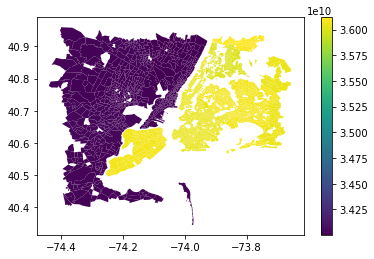

In [200]:
print(TW_FQpd.shape,TW_FQpd.columns)
TW_FQpd_temp = TW_FQpd.merge(mergedgpd, on ='GEOID')
print(TW_FQpd_temp.shape,TW_FQpd_temp.columns[:10])
TW_FQpd_temp = gpd.GeoDataFrame(TW_FQpd_temp)
figure, ax = plt.subplots()
TW_FQpd_temp.plot(column='GEOID',legend = True, ax=ax)

In [201]:
 list(Census_combined.columns)

['GEOID',
 'pop00_x',
 'phisp00',
 'pnhblk00',
 'pasian00',
 'popden00',
 'unempden00',
 'pag25up00',
 'TOD',
 'abm_dif_9000',
 'abm_inc_90_00',
 'abovemedli00',
 'abovemednwh00',
 'abovemedrent00',
 'afford00',
 'afford90',
 'belowmedcol00',
 'belowmedcol90',
 'carcommuters_00',
 'ch_all_li_count90_00',
 'edudiff9000',
 'gent90_00',
 'hinc00',
 'hinc90',
 'hotmarket00(110%-207%)',
 'medhval00',
 'medhval90',
 'medrent00',
 'medrent90',
 'new_abm_dif_9000',
 'new_ch_all_li_count90_00',
 'new_gent90_00',
 'new_hinc00',
 'new_hinc90',
 'new_hotmarket00(110%-207%)',
 'new_medhval00',
 'new_medhval90',
 'new_medrent00',
 'new_medrent90',
 'new_pct_ch_hinc90_00',
 'new_per_rent_00',
 'new_per_rent_90',
 'new_vuln00',
 'pct_ch_hinc90_00',
 'per_rent_00',
 'per_rent_90',
 'percol00',
 'percol90',
 'perli00',
 'perli90',
 'pernwh00',
 'pernwh90',
 'pop00_y',
 'vuln00',
 'vuln90',
 'vulnrisk00',
 'vulnrisk90']

In [202]:
print(TW_FQpd.shape)
Census_FQpd = Census_combined.merge(TW_FQpd,on='GEOID')
print(Census_FQpd.shape)
Census_FQpd.head(1)

(2676, 397)
(2676, 453)


,GEOID,pop00_x,phisp00,pnhblk00,pasian00,popden00,unempden00,pag25up00,TOD,abm_dif_9000,...,350,351,352,353,354,355,356,357,358,359
0,34003003200,4484.0,0.21744,0.06512,0.176405,3.379735e+07,670821.53616,0.701383,0.0,1.0,...,0.018684,-0.030087,-0.034372,-0.004801,0.028408,-0.005151,-0.015811,-0.027402,0.013328,-0.020132


## ADD GEOMETRY & TYPOLOGIES

In [203]:
print(Census_FQpd.shape,Census_FQpd.columns)
Census_FQpd = Census_FQpd.merge(mergedgpd, on ='GEOID')
print(Census_FQpd.shape,Census_FQpd.columns[:10])

(2676, 453) Index(['GEOID', 'pop00_x', 'phisp00', 'pnhblk00', 'pasian00', 'popden00',
       'unempden00', 'pag25up00', 'TOD', 'abm_dif_9000',
       ...
       '350', '351', '352', '353', '354', '355', '356', '357', '358', '359'],
      dtype='object', length=453)
(2676, 463) Index(['GEOID', 'pop00_x', 'phisp00', 'pnhblk00', 'pasian00', 'popden00',
       'unempden00', 'pag25up00', 'TOD', 'abm_dif_9000'],
      dtype='object')


In [204]:
Census_FQpd.columns[-10:]

Index(['geometry', 'Type_1.19', 'pct_ch_percol00_16_binary',
       'pct_ch_hinc00_16_binary', 'pct_ch_medhval00_16_binary',
       'pct_ch_medrent00_16_binary', 'Ongoing_adv_gent', 'gent00_16',
       'gent90_00_y', 'Supergent16'],
      dtype='object')

In [205]:
typologies = ['Type_1.19','pct_ch_percol00_16_binary','pct_ch_hinc00_16_binary',\
           'pct_ch_medhval00_16_binary','pct_ch_medrent00_16_binary','pct_ch_percol00_16_binary','Ongoing_adv_gent',
                                        'gent00_16',
                                      'Supergent16']

In [206]:
Census_FQpd = gpd.GeoDataFrame(Census_FQpd)

In [207]:
print(Census_FQpd.shape)
Census_FQpd.dropna(inplace=True)
print(Census_FQpd.shape)

(2676, 463)
(2676, 463)


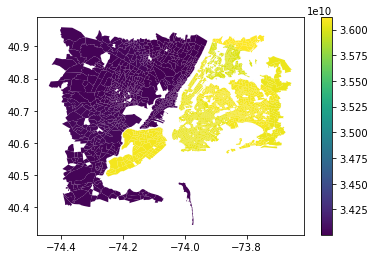

In [208]:
# visualize what is left
figure, ax = plt.subplots()
Census_FQpd.plot(column='GEOID',legend = True, ax=ax)

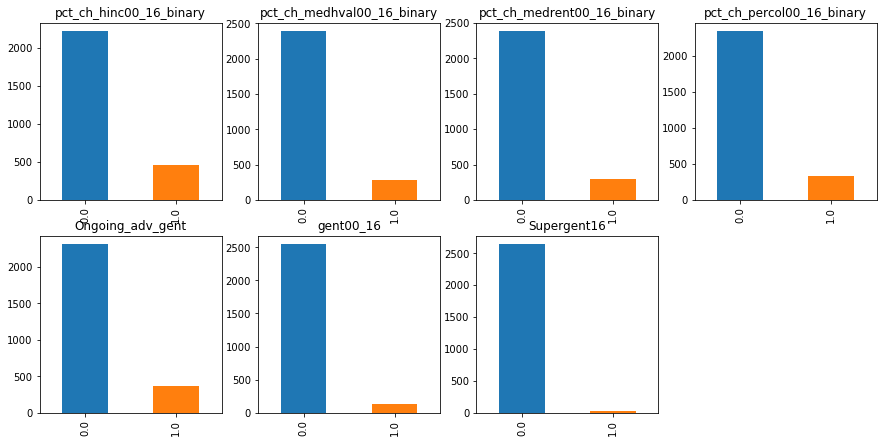

In [209]:
bin_typs = ['pct_ch_hinc00_16_binary',
            'pct_ch_medhval00_16_binary','pct_ch_medrent00_16_binary','pct_ch_percol00_16_binary','Ongoing_adv_gent',
            'gent00_16','Supergent16']
for i, column in enumerate(bin_typs):
    plt.figure(1)
    plt.subplot(4,4,i+1)
    Census_FQpd[column].value_counts().plot(kind='bar', figsize = (15,15), title=column)
    Census_FQpd[column].value_counts()/Census_FQpd[column].value_counts().sum()

# Part II. Modeling

In [210]:
Census_FQpd_beforedrops = Census_FQpd.copy()


In [211]:
binary6typ


'pct_ch_hinc00_16_binary'

In [212]:
### Preprocessing Data

y = Census_FQpd[binary6typ]
X_Census_FQpd = Census_FQpd.drop(typologies+['GEOID','geometry'],axis =1).copy()
print(X_Census_FQpd.shape)
X_Census_FQpd.dropna(inplace=True)
print(X_Census_FQpd.shape)

(2676, 453)
(2676, 453)


In [213]:
X_Census_FQpd.columns

Index(['pop00_x', 'phisp00', 'pnhblk00', 'pasian00', 'popden00', 'unempden00',
       'pag25up00', 'TOD', 'abm_dif_9000', 'abm_inc_90_00',
       ...
       '351', '352', '353', '354', '355', '356', '357', '358', '359',
       'gent90_00_y'],
      dtype='object', length=453)

In [214]:
# Normalize

min_max_scaler = MinMaxScaler()

models = ['Raw','Scaled','Minmaxed']
Xdata_scaled = preprocessing.scale(X_Census_FQpd)
# ydata_scaled = preprocessing.scale(y)

Xdata_minmaxed = min_max_scaler.fit_transform(X_Census_FQpd)
# ydata_minmaxed = min_max_scaler.fit_transform(y)

dictx = {}
dictx['Raw'] = X_Census_FQpd
dictx['Scaled'] = Xdata_scaled
dictx['Minmaxed'] = Xdata_minmaxed
                    

# x = dictx[model][0]
# y = dictx[model][1]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [215]:
model_f1_scores = {}
model_recall_scores = {}
model_precision_scores = {}
imp_dict = {}
names_dict ={}
model = {}
modelslist = ['Logit','DT','RF','SVM'] 
for m in models:
    # X_train[m], X_test[m], y_train[m], y_test[m]
    dictx[m]
    model[m] = {}
    model_f1_scores[m] = {}
    model_recall_scores[m] ={}
    model_precision_scores[m] = {}
    imp_dict[m] = {}
    names_dict[m] = {}
resultset=Census_FQpd_beforedrops.copy()

In [216]:
X_train = {}
X_test = {}
y_train = {}
y_test = {}
for m in models:

    X_train[m], X_test[m], y_train[m], y_test[m] = train_test_split(dictx[m], y, test_size = 0.3, random_state = 1)    
    #x >> dictx[m][0]
    # y =>> dictx[m][1]
    print(X_train[m].shape, X_test[m].shape, y_train[m].shape, y_test[m].shape)

(1873, 453) (803, 453) (1873,) (803,)
(1873, 453) (803, 453) (1873,) (803,)
(1873, 453) (803, 453) (1873,) (803,)


In [217]:
model
def f_importances_neg(coef, names,m):
    
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    imp = imp[:20]
    names = names[:20]
    plt.figure(figsize=(5,5))
    plt.title('Negative Weights of Logistic Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)  
    plt.xticks(size = 8)
    plt.show()
def f_importances_pos(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    imp = imp[-20:]
    names = names[-20:]
    plt.figure(figsize=(5,5))
    plt.title('Positive Weights of Logistic Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
#     plt.xlabel(size=8)
    plt.xticks(size = 8)
    plt.show()
def f_importances_unimp(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    lenimp_2 = len(imp)//2
    imp = imp[lenimp_2-10:lenimp_2+10]
    names = names[lenimp_2-10:lenimp_2+10]
    plt.figure(figsize=(5,5))
    plt.title('Weights of Logistic Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.xticks(size = 8)
    plt.show()
def f_importances_all(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    plt.figure(figsize=(5,5))
    plt.title('Negative Weights of Logistic Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.xticks(size = 8)
    plt.show()

# LR

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(1, 453)


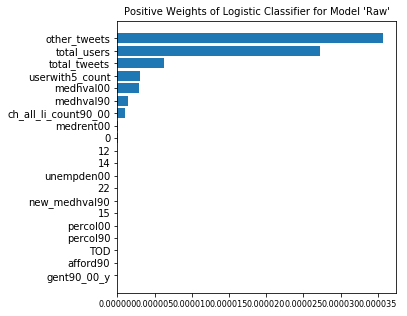

(1, 453)


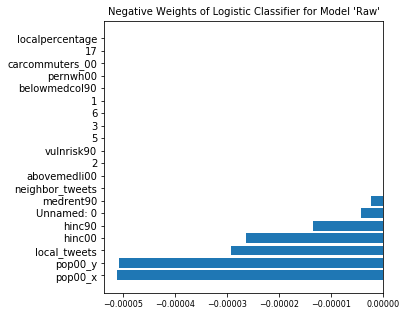

(1, 453)


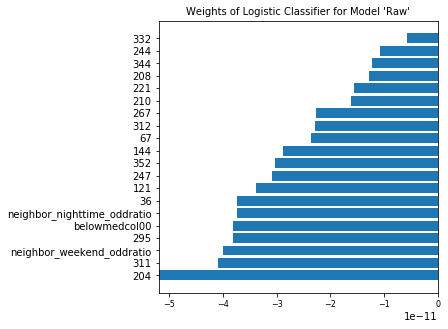

(1, 453)


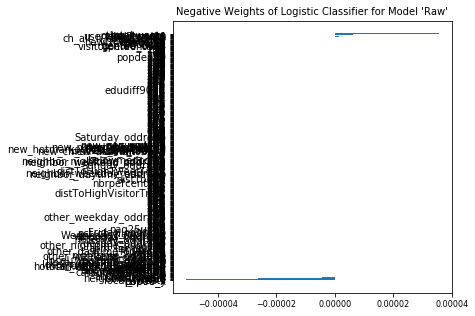

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(1, 453)


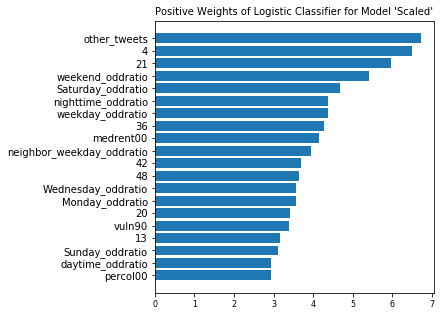

(1, 453)


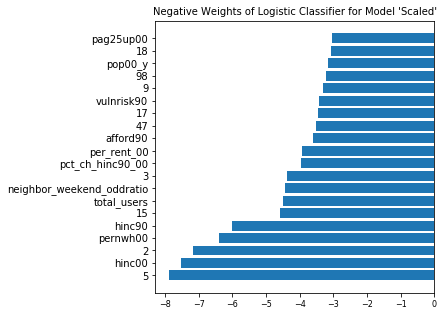

(1, 453)


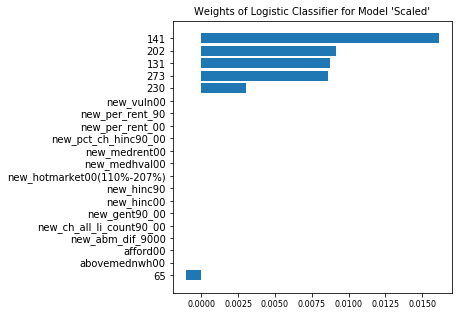

(1, 453)


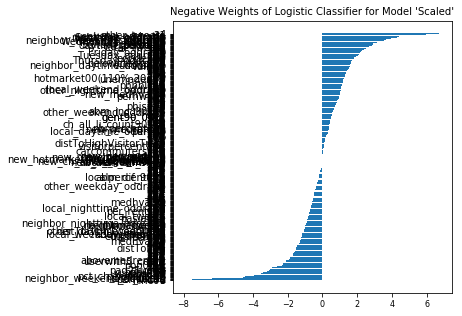

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(1, 453)


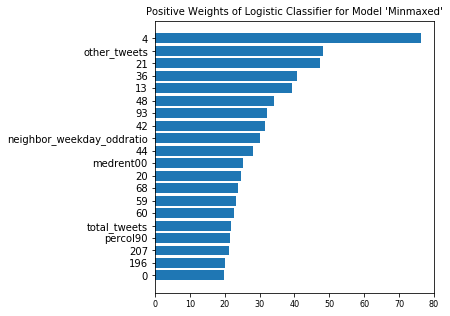

(1, 453)


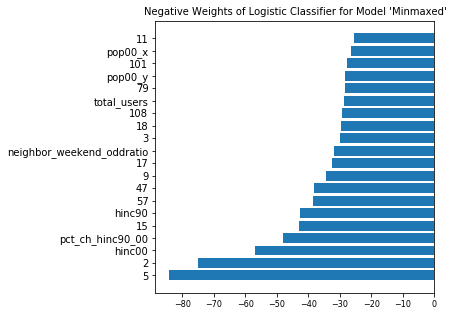

(1, 453)


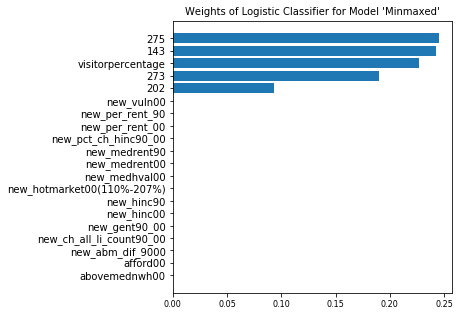

(1, 453)


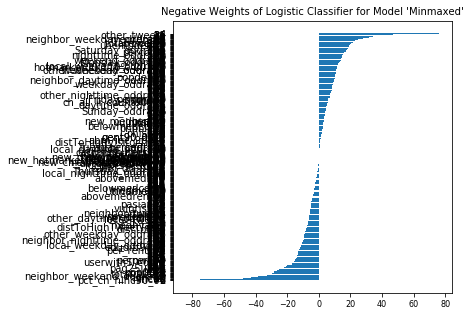

,Minmaxed,Raw,Scaled
Logit,"(-84.325409118, -75.1022451629, -56.9417426888...","(-5.11259018454e-05, -5.08768534633e-05, -2.93...","(-7.88688238268, -7.51149347359, -7.1556729578..."


In [218]:
## Logistic Reeg
imp = {}
for m in models:
#     dictx[m]
#     model[m]
# X_train[m], X_test[m], y_train[m], y_test[m]

    logit_1 = LogisticRegression(C = 10000)
#     print(X_train[m].shape,y_train[m].shape)
    logit_1.fit(X_train[m], y_train[m])
#     print(logit_1.score(X_test[m],y_test[m]))
    model[m]['Logit'] = logit_1.score(X_test[m],y_test[m])
#     resultset[m+'_Logit_predicttyp']=logit_1.predict(dictx[m])
    y_pred = logit_1.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['Logit'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['Logit'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['Logit'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    f_importances_pos(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    f_importances_neg(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    f_importances_unimp(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    imp3,names = zip(*sorted(zip(list(logit_1.coef_)[0],np.asarray(list(X_train['Raw'].columns)))))
    names_dict[m]['Logit'] = names
    imp_dict[m]['Logit'] =  imp3
    f_importances_all(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
model_f1_scores
pd.DataFrame(imp_dict)

In [219]:
def featureImportancePlot_dt(rf, labels,m):
    importances = rf.feature_importances_[:]
    indices = np.argsort(importances)[::-1]
    importances_10 = rf.feature_importances_[:][:10]
    indices_10 = np.argsort(importances_10)[::-1]
    #std = np.std([tree.feature_importances_ for tree in rf.estimators_],
    #         axis=0)
    pl.figure(figsize=(5,5))
    pl.title("Feature importances")
    pl.bar(range(indices_10.shape[0]), rf.feature_importances_[indices_10],
       color="SteelBlue", #yerr=std[indices]
           align="center")
    pl.xticks(range(indices_10.shape[0]), np.array(labels)[indices_10], rotation=90)
    pl.xlim([-1, indices_10.shape[0]])
    pl.show()    
    return rf.feature_importances_[indices], np.array(labels)[indices]

# DT

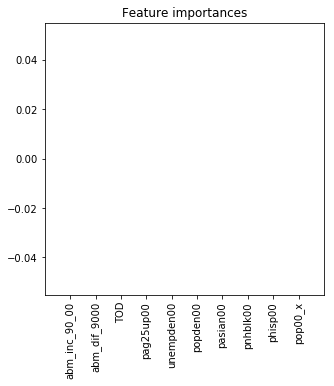

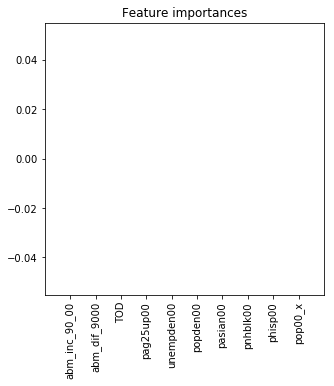

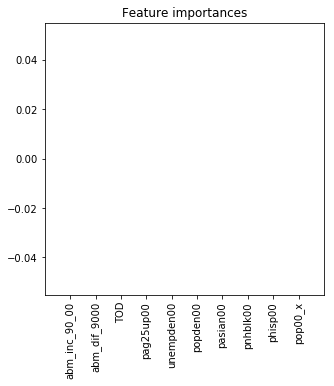

{'Minmaxed': {'DT': 0.47413793103448276, 'Logit': 0.40677966101694912},
 'Raw': {'DT': 0.47413793103448276, 'Logit': 0.18390804597701149},
 'Scaled': {'DT': 0.47413793103448276, 'Logit': 0.39322033898305081}}

In [220]:
seed = 5
# print(y_train.shape, X_train.shape)
for m in models:
    #     dictx[m]
    #     model[m]

    OS = []
#     param_grid = {'n_estimators':range(1,11),'max_depth':range(1,11),'max_leaf_nodes':range(2,11)}
#     dt=DecisionTreeClassifier()
#     gr=GridSearchCV(dt,param_grid=param_grid,scoring='roc_auc')
#     ds=gr.fit(X_train[m],y_train[m])

    for c in range(5):
#         print (ds.best_params_,ds.best_params_['max_depth'],ds.best_params_['max_leaf_nodes'])
        dt=DecisionTreeClassifier()
        dt = DecisionTreeClassifier(max_depth=3)
        dt.fit(X_train[m], y_train[m])
        pred=dt.predict_proba(X_test[m])[:,1]
        OS.append(dt.score(X_test[m],y_test[m]))
    model[m]['DT'] = mean(OS)
#     resultset[m+'_DT_predicttyp']=dt.predict(dictx[m])
    y_pred = dt.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['DT'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['DT'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['DT'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    imp_dict[m]['DT'], names_dict[m]['DT'] =  featureImportancePlot_dt(dt, X_Census_FQpd.columns,m)
model_f1_scores

In [221]:
model_f1_scores['Raw']['DT']

0.47413793103448276

In [222]:
resultset['actualtyp']=y

# Random Forest

In [223]:
def featureImportancePlot(rf, labels,m):
    '''plots feature importance for random forest
    rf: the random forest model fit to the data
    labels: the names of the features
    '''
    
    importances = rf.feature_importances_[:10]
    indices = np.argsort(importances)[::-1]
    std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)

    pl.figure()
    pl.title("Feature importances for Model"+ m)
    pl.bar(range(indices.shape[0]), rf.feature_importances_[indices],
       color="SteelBlue", yerr=std[indices], align="center")
    pl.xticks(range(indices.shape[0]), np.array(labels)[indices], rotation=90)
    pl.xlim([-1, indices.shape[0]])
    pl.show()


# def featureImportancePlot(rf, labels,m):
#     '''plots feature importance for random forest
#     rf: the random forest model fit to the data
#     labels: the names of the features
#     '''
#     importances = rf.feature_importances_
#     indices = np.argsort(importances)[::-1]
#     importances_10 = rf.feature_importances_[:10]
#     indices_10 = np.argsort(importances_10)[::-1]
#     std = np.std([tree.feature_importances_ for tree in rf.estimators_],
#              axis=0)

#     pl.figure(figsize=(5,5))
#     pl.title("Feature importances of Random Forest for Model "+m)
#     pl.bar(range(indices_10.shape[0]), rf.feature_importances_[indices_10],
#        color="SteelBlue", yerr=std[indices_10], align="center")
#     pl.xticks(range(indices_10.shape[0]), np.array(labels)[indices_10], rotation=90)
#     pl.xlim([-1, indices_10.shape[0]])
#     pl.show()
#     return rf.feature_importances_[indices], np.array(labels)[indices]

Raw


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 7, 'n_estimators': 10, 'max_depth': 7} 7 7
{'max_leaf_nodes': 7, 'n_estimators': 10, 'max_depth': 7} 7 7
{'max_leaf_nodes': 7, 'n_estimators': 10, 'max_depth': 7} 7 7


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'max_leaf_nodes': 7, 'n_estimators': 10, 'max_depth': 7} 7 7
{'max_leaf_nodes': 7, 'n_estimators': 10, 'max_depth': 7} 7 7


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


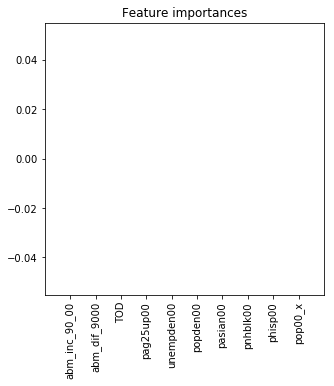

Scaled


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 10, 'n_estimators': 9, 'max_depth': 5} 5 10
{'max_leaf_nodes': 10, 'n_estimators': 9, 'max_depth': 5} 5 10


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'max_leaf_nodes': 10, 'n_estimators': 9, 'max_depth': 5} 5 10
{'max_leaf_nodes': 10, 'n_estimators': 9, 'max_depth': 5} 5 10


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'max_leaf_nodes': 10, 'n_estimators': 9, 'max_depth': 5} 5 10


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


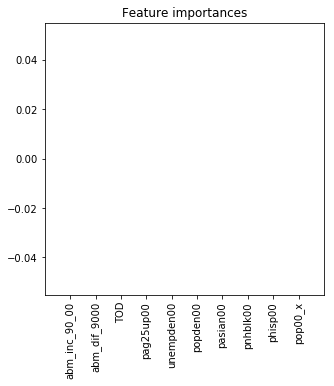

Minmaxed


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 7, 'n_estimators': 8, 'max_depth': 3} 3 7
{'max_leaf_nodes': 7, 'n_estimators': 8, 'max_depth': 3} 3 7
{'max_leaf_nodes': 7, 'n_estimators': 8, 'max_depth': 3} 3 7


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'max_leaf_nodes': 7, 'n_estimators': 8, 'max_depth': 3} 3 7
{'max_leaf_nodes': 7, 'n_estimators': 8, 'max_depth': 3} 3 7


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


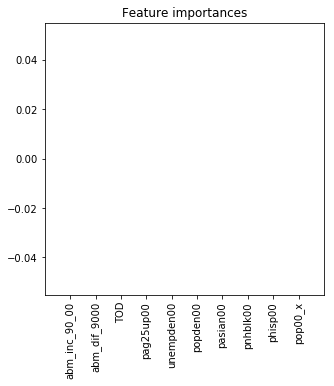

{'Minmaxed': {'DT': 0.47413793103448276,
  'Logit': 0.40677966101694912,
  'RF': 0.14999999999999999},
 'Raw': {'DT': 0.47413793103448276,
  'Logit': 0.18390804597701149,
  'RF': 0.1032258064516129},
 'Scaled': {'DT': 0.47413793103448276,
  'Logit': 0.39322033898305081,
  'RF': 0.1951219512195122}}

In [224]:
for m in models:
    #     dictx[m]
    print(m)
    param_grid = {'max_depth':range(1,11),'n_estimators':range(1,11),'max_leaf_nodes':range(2,11)}
    rf=RandomForestClassifier()
    gr=GridSearchCV(rf,param_grid=param_grid,scoring='roc_auc')
    rs=gr.fit(X_train[m],y_train[m])
    OS = []
    for c in range(5):
        print(rs.best_params_,rs.best_params_['max_depth'],rs.best_params_['max_leaf_nodes'])
        rf = RandomForestClassifier(max_depth=rs.best_params_['max_depth'],max_leaf_nodes=rs.best_params_['max_leaf_nodes'])
        rf.fit(X_train[m], y_train[m])
        pred=rf.predict_proba(X_test[m])[:,1]
        OS.append(rf.score(X_test[m],y_test[m]))
    model[m]['RF'] = mean(OS)
    resultset[m+'_RF_predicttyp']=rf.predict(dictx[m])
    y_pred = rf.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['RF'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['RF'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['RF'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    imp_dict[m]['RF'], names_dict[m]['RF'] =  featureImportancePlot_dt(dt, X_Census_FQpd.columns,m)
model_f1_scores

#### Note that the features have changed considerably with the updated binary typology-- users and checkins were the most important features initially.

# SVM

In [225]:
model
def f_importances_neg(coef, names,m):
    
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    imp = imp[:20]
    names = names[:20]
    plt.figure(figsize=(5,5))
    plt.title('Negative Weights of SVM Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)  
    plt.xticks(size = 8)
    plt.show()
def f_importances_pos(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    imp = imp[-20:]
    names = names[-20:]
    plt.figure(figsize=(5,5))
    plt.title('Positive Weights of SVM Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
#     plt.xlabel(size=8)
    plt.xticks(size = 8)
    plt.show()
def f_importances_unimp(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    lenimp_2 = len(imp)//2
    imp = imp[lenimp_2-10:lenimp_2+10]
    names = names[lenimp_2-10:lenimp_2+10]
    plt.figure(figsize=(5,5))
    plt.title('Weights of SVM Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.xticks(size = 8)
    plt.show()
def f_importances_all(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    plt.figure(figsize=(5,5))
    plt.title('Negative Weights of SVM Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
#     plt.xlabel(size=8)
    plt.xticks(size = 8)
    plt.show()



Raw
0.821917808219
0.821917808219
(1, 453)


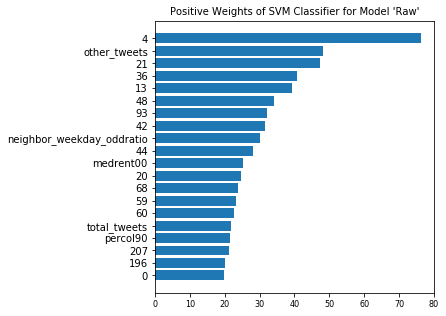

(1, 453)


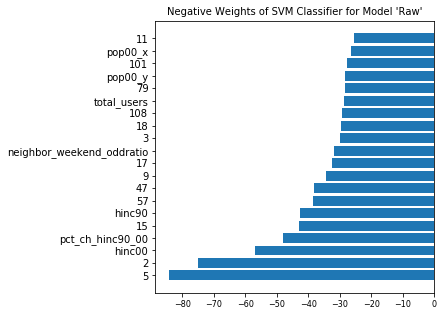

(1, 453)


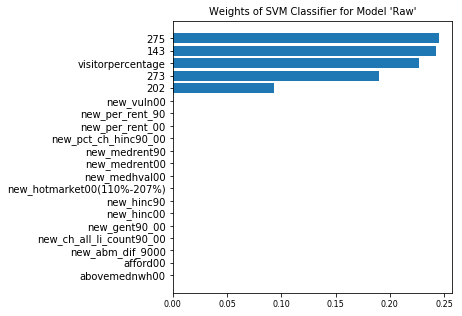

Scaled
0.824408468244
0.824408468244
(1, 453)


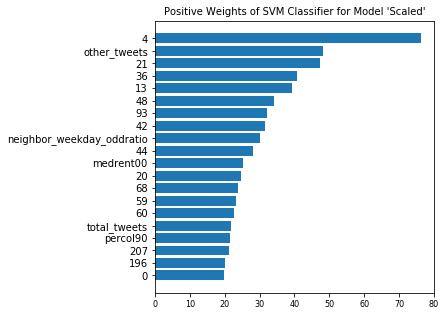

(1, 453)


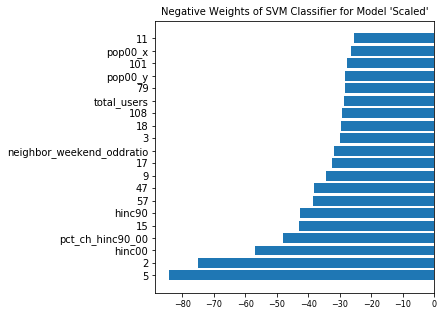

(1, 453)


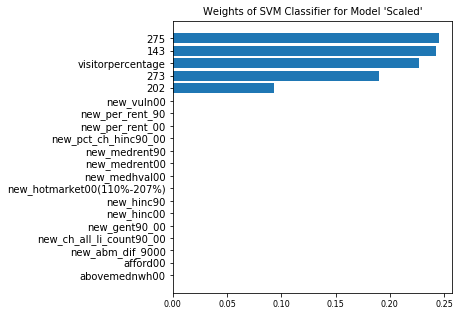

Minmaxed
0.821917808219
0.821917808219
(1, 453)


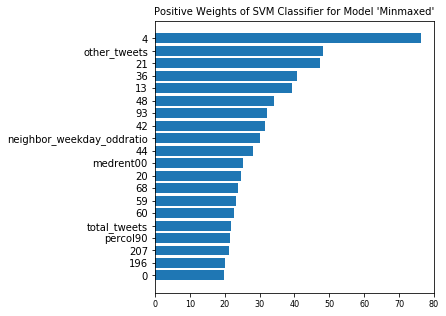

(1, 453)


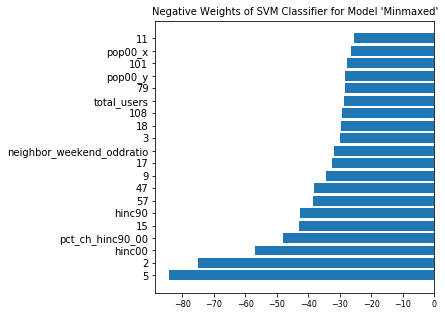

(1, 453)


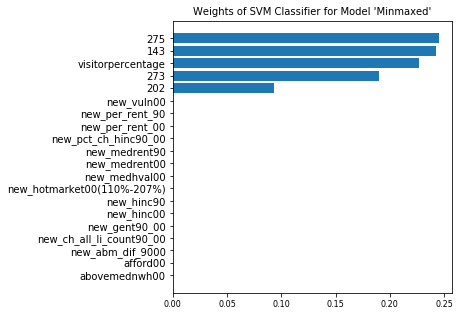

{'Minmaxed': {'DT': 0.47413793103448276,
  'Logit': 0.40677966101694912,
  'RF': 0.14999999999999999,
  'SVM': 0.14999999999999999},
 'Raw': {'DT': 0.47413793103448276,
  'Logit': 0.18390804597701149,
  'RF': 0.1032258064516129,
  'SVM': 0.31941923774954628},
 'Scaled': {'DT': 0.47413793103448276,
  'Logit': 0.39322033898305081,
  'RF': 0.1951219512195122,
  'SVM': 0.31932773109243695}}

In [226]:

# When C is very small, we are willing to tolerate more mistakes. If C is very big, this
# means we hardly tolerate any mistakes. So, we cannot choose a very large C if our data is not
# really separable. Let's however choose from a broad range of reasonable options.
# param_grid = {'kernel':['linear'],'C':[np.exp(i) for i in np.linspace(-10,10,10)]}
for m in models:
    print(m)
    OS = []
    #     dictx[m]
        #     model[m]
    rr = svm.SVC(gamma='auto')
    rr.fit(X_train[m], y_train[m])
    correct=1.0*(rr.predict(X_test[m])==np.asarray(y_test[m])).sum()/len(y_test[m])
    print(correct)
    print(rr.score(X_test[m],y_test[m]))
    OS.append(correct)
#     resultset[m+'_SVM_predicttyp']=rr.predict(dictx[m])
    model[m]['SVM'] = mean(OS)
    y_pred = rf.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['SVM'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['SVM'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['SVM'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    f_importances_pos(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    f_importances_neg(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    f_importances_unimp(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    imp3,names = zip(*sorted(zip(list(logit_1.coef_)[0],np.asarray(list(X_train['Raw'].columns)))))
    names_dict[m]['SVM'] = names
    imp_dict[m]['SVM'] = imp3 
model_f1_scores

# Summary of Results

In [227]:
X_Census_FQpd.columns

Index(['pop00_x', 'phisp00', 'pnhblk00', 'pasian00', 'popden00', 'unempden00',
       'pag25up00', 'TOD', 'abm_dif_9000', 'abm_inc_90_00',
       ...
       '351', '352', '353', '354', '355', '356', '357', '358', '359',
       'gent90_00_y'],
      dtype='object', length=453)

In [228]:
X_Census_FQpd.shape

(2676, 453)

In [229]:
df1 = pd.DataFrame(model_f1_scores)
df2 = pd.DataFrame(model_recall_scores)
df3 =pd.DataFrame(model_precision_scores)
result = pd.concat([df1, df2,df3], axis=1, sort=False)
result

,Minmaxed,Raw,Scaled,Minmaxed,Raw,Scaled,Minmaxed,Raw,Scaled
DT,0.474138,0.474138,0.474138,0.384615,0.384615,0.384615,0.617978,0.617978,0.617978
Logit,0.406780,0.183908,0.393220,0.419580,0.111888,0.405594,0.394737,0.516129,0.381579
RF,0.150000,0.103226,0.195122,0.083916,0.055944,0.111888,0.705882,0.666667,0.761905
SVM,0.150000,0.319419,0.319328,0.083916,0.615385,0.265734,0.705882,0.215686,0.400000


In [230]:
model_name

'4_CENSUS_FQ_TW_pct_ch_hinc00_16ALL'

In [231]:
result.to_csv('./Results/Scores'+model_name+'.csv')

In [232]:
names_pd = pd.DataFrame()
counter = {}
for m in models:
    print(m)
    for standarized in modelslist:
        for i, weights in enumerate(names_dict[m][standarized]):
            standarized_m = str(standarized)+'_'+str(m)
            names_pd.loc[standarized_m,weights] = imp_dict[m][standarized][i]


Raw
Scaled
Minmaxed


In [233]:
for i in names_pd.index:
    print(names_pd.loc[i].idxmax())

other_tweets
2
2
4
other_tweets
2
2
4
4
2
2
4


In [234]:
model_name

'4_CENSUS_FQ_TW_pct_ch_hinc00_16ALL'

In [235]:
names_pd.to_csv('./Results/'+model_name+'.csv')
names_pd

,pop00_x,pop00_y,local_tweets,hinc00,hinc90,Unnamed: 0,medrent90,neighbor_tweets,abovemedli00,2,...,12,0,medrent00,ch_all_li_count90_00,medhval90,medhval00,userwith5_count,total_tweets,total_users,other_tweets
Logit_Raw,-0.000051,-0.000051,-0.000029,-0.000026,-0.000014,-0.000004,-0.000002,-6.586951e-08,-1.802287e-08,-1.421341e-08,...,6.247197e-09,3.554492e-08,1.310563e-07,0.000001,0.000001,0.000003,0.000003,0.000006,0.000027,0.000036
DT_Raw,0.000000,0.000000,0.000000,0.074494,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,3.611242e-01,...,1.110589e-01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.096896,0.000000,0.000000,0.000000
RF_Raw,0.000000,0.000000,0.000000,0.074494,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,3.611242e-01,...,1.110589e-01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.096896,0.000000,0.000000,0.000000
SVM_Raw,-26.581464,-28.412819,-6.295695,-56.941743,-42.792855,-2.995546,-6.063655,-5.792745e+00,-1.639425e+00,-7.510225e+01,...,1.878647e+01,1.982810e+01,2.516995e+01,5.721430,-2.912180,-7.222184,-15.338808,21.786042,-28.567926,48.089354
Logit_Scaled,-2.267467,-3.158009,-0.783335,-7.511493,-6.013912,-0.974903,-1.160498,-9.429026e-01,-1.152408e+00,-7.155673e+00,...,1.654192e+00,2.225781e+00,4.141156e+00,0.420517,-0.583576,-1.266153,-1.909739,2.841968,-4.487176,6.720303
DT_Scaled,0.000000,0.000000,0.000000,0.074494,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,3.611242e-01,...,1.110589e-01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.096896,0.000000,0.000000,0.000000
RF_Scaled,0.000000,0.000000,0.000000,0.074494,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,3.611242e-01,...,1.110589e-01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.096896,0.000000,0.000000,0.000000
SVM_Scaled,-26.581464,-28.412819,-6.295695,-56.941743,-42.792855,-2.995546,-6.063655,-5.792745e+00,-1.639425e+00,-7.510225e+01,...,1.878647e+01,1.982810e+01,2.516995e+01,5.721430,-2.912180,-7.222184,-15.338808,21.786042,-28.567926,48.089354
Logit_Minmaxed,-26.581464,-28.412819,-6.295695,-56.941743,-42.792855,-2.995546,-6.063655,-5.792745e+00,-1.639425e+00,-7.510225e+01,...,1.878647e+01,1.982810e+01,2.516995e+01,5.721430,-2.912180,-7.222184,-15.338808,21.786042,-28.567926,48.089354
DT_Minmaxed,0.000000,0.000000,0.000000,0.074494,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,3.611242e-01,...,1.110589e-01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.096896,0.000000,0.000000,0.000000


- You can refer to https://github.com/mv1742/updny_2